In [ ]:
!pip install gdown
!pip install patool


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
import pandas as pd
import numpy as np
import json
from IPython import display
from urllib.request import urlopen
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px



# Allow multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def download_from_gdrive(url, output):
  gdown.download(url, output, quiet=False)
  # get_ipython().system_raw("unrar x /content/" + output)



In [ ]:
# Dowload and unpack dataset
url = 'https://drive.google.com/u/0/uc?id=1ENhBp2KkbTiarpeOjCOSQla-wUkc2Vfl&export=download'
download_from_gdrive(url, '03&04_17_VSE.csv')

Downloading...
From: https://drive.google.com/u/0/uc?id=1ENhBp2KkbTiarpeOjCOSQla-wUkc2Vfl&export=download
To: /content/03&04_17_VSE.csv
100%|██████████| 242M/242M [00:02<00:00, 101MB/s] 


In [ ]:
# Style

colormap = 'plasma'
colors = px.colors.sequential.Plasma_r

def value_counts_to_df(value_counts):
  return pd.DataFrame({'category': value_counts.value_counts().index, 'count': value_counts.value_counts().values})


In [ ]:
df = pd.read_csv('03&04_17_VSE.csv', encoding = "cp1251", sep=';')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [ ]:
df.shape

(691539, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      691539 non-null  object
 1   ДатаДоставки              690913 non-null  object
 2   НомерЗаказаНаСайте        691535 non-null  object
 3   НовыйСтатус               691539 non-null  object
 4   СуммаЗаказаНаСайте        691539 non-null  object
 5   СуммаДокумента            691539 non-null  object
 6   МетодДоставки             691539 non-null  object
 7   ФормаОплаты               691539 non-null  object
 8   Регион                    686397 non-null  object
 9   Группа2                   616853 non-null  object
 10  Группа3                   616853 non-null  object
 11  Группа4                   585914 non-null  object
 12  Тип                       691539 non-null  object
 13  Номенклатура              691539 non-null  object
 14  ТипТ

In [ ]:
df

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3 240,3 240,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ КИТАЙ,КГТ,"BABYHIT, КОЛЯСКА (син/черн)",КГТ,Нет,NaN,1,3 240,3 240,2 700,4,2 017,23111,В процессе,Регионы,540,0,0,1,1,17.04.2017 0:00,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1 377,1 377,Магазины,Безналичная,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,NaN,1,464,464,"324,8",4,2 017,GL0285876,Доставлен,Москва,"139,2",49,49,2,1,17.04.2017 0:00,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,NaN,1,249,249,207,4,2 017,GL0285876,Доставлен,Регионы,42,0,0,1,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1 098,2 086,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,NaN,1,849,849,705,4,2 017,GL0285876,Доставлен,Регионы,144,0,0,2,1,17.04.2017 0:00,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,

First, it is needed to find out the number and ratio of unique values, empty values, zeros, data types.

In [ ]:
df_stat = pd.concat(
    {
        "# of NaN's": df.isna().sum(),
        "% of NaN's": round(df.isna().sum() / df.shape[0] * 100, 2),
        "# of zeros": df.isin([0]).sum(),
        "% of zeros": round(df.isin([0]).sum() / df.shape[0] * 100, 2),
        "# of Unique Values": df.nunique(),
        "Data Type": df.dtypes

    }, axis=1)



In [ ]:

df_stat.sort_values('# of NaN\'s',ascending=False).head(17).style.background_gradient(cmap = colormap)


,# of NaN's,% of NaN's,# of zeros,% of zeros,# of Unique Values,Data Type
МагазинЗаказа,686556,99.280000,0,0.000000,89,object
ПричинаОтмены,624836,90.350000,0,0.000000,31,object
ПВЗ_код,228886,33.100000,0,0.000000,4,object
Группа4,105625,15.270000,0,0.000000,411,object
Маржа,76913,11.120000,0,0.000000,43917,object
ЦенаЗакупки,76913,11.120000,0,0.000000,24782,object
ТипТовара,74690,10.800000,0,0.000000,2,object
Группа2,74686,10.800000,0,0.000000,13,object
Группа3,74686,10.800000,0,0.000000,93,object
ЭлектроннаяПочта_new,13117,1.900000,0,0.000000,6176,object


In [ ]:
# Remove unnecessary columns
df.drop(['ПВЗ_код','ID_SKU','ЭлектроннаяПочта_new', 'Клиент', 'ФормаОплаты'],axis=1, inplace=True)

In [ ]:
# Since only delivered orders should be taken into account in the analysis, the reasons of reject are omitted
df.drop(['ПричинаОтмены'],axis=1, inplace=True)

In [ ]:
df.shape

(691539, 32)

To work with numeric variables properly, the columns are formated to Pythonic representation of numbers and dates

In [ ]:
# Set the date format
format_date = lambda x:pd.to_datetime(x.str.replace(' 0',' 00'), format="%d.%m.%Y %H:%M")
df['Дата'] = format_date(df['Дата'])
df['ДатаДоставки'] = format_date(df['ДатаДоставки'])
df['ДатаЗаказаНаСайте'] = format_date(df['ДатаЗаказаНаСайте'])




In [ ]:
df['ГодДаты'] = pd.DatetimeIndex(df['Дата']).year
df['МесяцДаты'] = pd.DatetimeIndex(df['Дата']).month
df['ДеньНеделиДаты'] = pd.DatetimeIndex(df['Дата']).day_of_week+1
df['ДеньДаты'] = pd.DatetimeIndex(df['Дата']).day
df['ВремяОкруглДаты'] = pd.DatetimeIndex(df['Дата']).floor('H').time

In [ ]:
# Format the price
format_money = lambda x:x.str.replace(',','.').str.replace(' ','').astype(float)
df['Цена'] = format_money(df['Цена'])
df['ЦенаЗакупки'] = format_money(df['ЦенаЗакупки'])
df['СуммаДокумента'] = format_money(df['СуммаДокумента'])
df['СуммаЗаказаНаСайте'] = format_money(df['СуммаЗаказаНаСайте'])
df['СуммаСтроки'] = format_money(df['СуммаСтроки'])
df['Маржа'] = format_money(df['Маржа'])
df['СуммаУслуг'] = format_money(df['СуммаУслуг'])
df['СуммаДоставки'] = format_money(df['СуммаДоставки'])

There are two similar columns "Статус" and "НовыйСтатус" and are compared in the next cells

In [ ]:
df['Статус'].unique()

array(['Возврат', 'Доставлен', 'В процессе', 'Отменен', 'Не определен'],
      dtype=object)

In [ ]:
df['НовыйСтатус'].unique()

array(['Частичный возврат', 'Доставлен', 'К отгрузке', 'Возврат',
       'Возврат из ПВЗ', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'В резерве',
       'Отменен', 'Скомплектован Регион', 'Отменяется', 'Отправлен в ПВЗ',
       'Передан в Регион', 'Комплектация Регион'], dtype=object)

In [ ]:
df.loc[df['НовыйСтатус'] != df['Статус']]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ГородМагазина,МагазинЗаказа,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,ВремяОкруглДаты
0,2017-03-01 11:41:00,2017-03-07,3998972_TR,Частичный возврат,12098.0,12247.0,Курьерская,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,1,680.0,680.0,172.00,3,2 017,Возврат,Москва,508.00,0.0,0.0,8,1,2017-02-28,55574854-48574951555577,0,NaN,2017,3,3,1,11:00:00
3,2017-03-01 03:06:00,2017-03-02,3999363_TR,К отгрузке,4998.0,4998.0,Курьерская,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,1,330.0,330.0,166.96,3,2 017,Доставлен,Москва,163.04,0.0,0.0,4,0,2017-03-01,55574851-55545249535475,0,NaN,2017,3,3,1,03:00:00
5,2017-03-01 12:19:00,2017-03-07,3999682_TR,К отгрузке,2962.0,2962.0,Курьерская,Москва,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Duplo, КОНСТРУКТОР Лошадки, (20 дет.)",МГТ,Нет,1,719.0,719.0,668.60,3,2 017,Доставлен,Москва,50.40,0.0,0.0,3,1,2017-03-01,55574851-53495753545674,0,NaN,2017,3,3,1,12:00:00
6,2017-03-01 12:19:00,2017-03-07,3999682_TR,К отгрузке,2962.0,2962.0,Курьерская,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ДЕТСКАЯ ОДЕЖДА (2-6 лет),леггинсы,ОДЕЖДА,"FUN TIME, ЛОСИНЫ р. 3 г",МГТ,Нет,1,490.0,490.0,296.00,3,2 017,Доставлен,Москва,194.00,0.0,0.0,4,1,2017-03-01,55574851-53495753545674,0,NaN,2017,3,3,1,12:00:00
7,2017-03-01 11:57:00,2017-03-09,3999687_TR,Частичный возврат,19991.0,19991.0,Курьерская,Москва,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КАНЦТОВАРЫ,предметы для рисования,ИГРУШКИ,"AMOS, МАРКЕРЫ Малыш, (12 цв)",МГТ,Нет,1,180.0,180.0,163.80,3,2 017,Возврат,Москва,16.20,300.0,300.0,10,1,2017-03-01,55574853-53565050515377,0,NaN,2017,3,3,1,11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691528,2017-04-17 02:05:00,2017-04-29,4410501_TR,Возврат из ПВЗ,2122.0,2122.0,Магазины,Москва,ОБУВЬ,ОБУВЬ ДЕТСКАЯ,сандально-туфельная группа,ОДЕЖДА,"ТОП-ТОП, САНДАЛИИ закрытые, (бел), р. 19-22",МГТ,Нет,1,420.0,420.0,280.00,4,2 017,Возврат,Москва,140.00,0.0,0.0,3,0,2017-04-17,55575455-48575054505274,0,NaN,2017,4,1,17,02:00:00
691529,2017-04-17 02:05:00,2017-04-29,4410501_TR,Возврат из ПВЗ,2122.0,2122.0,Магазины,Москва,ОБУВЬ,ОБУВЬ ДЕТСКАЯ,сандально-туфельная группа,ОДЕЖДА,"ТОП-ТОП, САНДАЛИИ закрытые, (гол+бел), р. 19-22",МГТ,Нет,1,672.0,672.0,448.00,4,2 017,Возврат,Москва,224.00,0.0,0.0,1,0,2017-04-17,55575455-48575054505274,0,NaN,2017,4,1,17,02:00:00
691532,2017-04-17 08:55:00,2017-04-27,4410905_TR,Возврат из ПВЗ,542.0,542.0,Магазины,Омск,ОБУВЬ,ОБУВЬ ДЕТСКАЯ,сандально-туфельная группа,ОДЕЖДА,"ТОП-ТОП, САНДАЛИИ закрытые, (коричн+желт), р. ...",МГТ,Нет,1,443.0,443.0,295.00,4,2 017,Возврат,Регионы,148.00,99.0,99.0,1,0,2017-04-17,55574852-51504952505577,0,NaN,2017,4,1,17,08:00:00
691533,2017-04-17 10:13:00,2017-05-05,1989000634_TR,Возврат из ПВЗ,10390.0,10390.0,Магазины,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ ЕВРОПА,КГТ,"CHICCO, КОЛЯСКА прогул. Simplicity Plus Top Eu...",КГТ,Нет,1,10390.0,10390.0,8021.00,4,2 017,Возврат,Регионы,2369.00,0.0,0.0,1,1,2017-04-16,55575056-57485748514977,Ростов-на-Дону,STORE_013,2017,4,1,17,10:00:00


In the analysis, the column "Статус" was chosen as the primary indicator of order status instead of "НовыйСтатус" due to its higher representation of "delivered" orders. This selection was made considering the dataset's origin from multiple databases, which resulted in discrepancies between the two columns. Notably, "НовыйСтатус" did not consistently reflect the actual new status, as evidenced by instances where "Статус" indicated an order being delivered while "НовыйСтатус" implied that the order was just being prepared for delivery. Hence, to ensure accuracy and consistency, the "Статус" column was utilized as the key identifier for order status within the analysis.

In [ ]:
df['НовыйСтатус'].value_counts()

Доставлен               255084
К отгрузке              232508
Возврат из ПВЗ           98966
Отменен                  58871
Частичный возврат        25107
Расформирован ПВЗ        10977
Принят в ПВЗ              4154
Скомплектован Регион      3265
Возврат                   1358
Отменяется                 946
В резерве                  285
Передан в Регион            10
Отправлен в ПВЗ              7
Комплектация Регион          1
Name: НовыйСтатус, dtype: int64

In [ ]:
df['Статус'].value_counts()

Доставлен       487592
Возврат         125431
Отменен          69848
В процессе        7722
Не определен       946
Name: Статус, dtype: int64

In [ ]:
# Display the distribution of values in the "Статус" column

fig = px.pie(
    value_counts_to_df(df["Статус"]),
    values="count",
    names="category",
    color_discrete_sequence=colors,
)

fig.update_layout(
    showlegend=True,
    legend=dict(title_font_family="Roboto", font=dict(size=26)),
    font=dict(
        family="Roboto",
        size=20,  # Set the font size here
    ),
)

In [ ]:
# Display the distribution of values in the "НовыйСтатус" column

px.pie(value_counts_to_df(df['НовыйСтатус']) , values='count', names='category',
             color_discrete_sequence=colors).show()


In [ ]:
df[df['Цена']==0]['НовыйСтатус'].value_counts()

К отгрузке           30
Частичный возврат     6
Возврат               2
Name: НовыйСтатус, dtype: int64

In [ ]:
df[df['Количество']==0]['НовыйСтатус'].value_counts()

Отменен                 10631
К отгрузке               6672
Доставлен                1150
Скомплектован Регион      875
Возврат из ПВЗ            591
Частичный возврат         189
Возврат                    61
Расформирован ПВЗ          57
Принят в ПВЗ               36
В резерве                  35
Отменяется                 10
Name: НовыйСтатус, dtype: int64

The present study aims to investigate the influence of services on the underlying data. The "СуммаСтроки" is derived as the product of the price and quantity variables. It is worth noting that the columns СуммаДокумента, СуммаЗаказаНаСайте, СуммаУслуг, СуммаДоставки are deemed irrelevant for the purposes of this analysis.

In [ ]:
df[['СуммаДокумента', 'СуммаЗаказаНаСайте', 'СуммаСтроки', 'СуммаУслуг', 'СуммаДоставки', 'Количество',
    'Цена', 'ЦенаЗакупки', 'КоличествоПроданоКлиенту', 'Маржа']]

,СуммаДокумента,СуммаЗаказаНаСайте,СуммаСтроки,СуммаУслуг,СуммаДоставки,Количество,Цена,ЦенаЗакупки,КоличествоПроданоКлиенту,Маржа
0,12247.0,12098.0,680.0,0.0,0.0,1,680.0,172.00,1,508.00
1,3759.0,4819.0,379.0,0.0,0.0,1,379.0,209.80,1,169.20
2,3325.0,3325.0,3325.0,0.0,0.0,1,3325.0,1149.00,1,2176.00
3,4998.0,4998.0,330.0,0.0,0.0,1,330.0,166.96,0,163.04
4,528.0,528.0,199.0,0.0,0.0,1,199.0,79.00,1,120.00
...,...,...,...,...,...,...,...,...,...,...
691534,3240.0,3240.0,3240.0,0.0,0.0,1,3240.0,2700.00,1,540.00
691535,1377.0,1377.0,464.0,49.0,49.0,1,464.0,324.80,1,139.20
691536,2086.0,1098.0,249.0,0.0,0.0,1,249.0,207.00,1,42.00
691537,2086.0,1098.0,849.0,0.0,0.0,1,849.0,705.00,1,144.00


In [ ]:
# Remove unnecessary columns
df.drop(['СуммаДокумента','СуммаЗаказаНаСайте','СуммаУслуг', 'СуммаДоставки'],axis=1, inplace=True)

In [ ]:
# Remove data related to delivery since it is a whole different analysis and it does not suit the current project
df.drop(["МетодДоставки","ДатаДоставки"], axis=1, inplace=True)

The analysis considers orders that were actually bought - status of order is delivered

In [ ]:
# Remove incorrect values of data
df.shape
df = df[(df['Количество'] > 0)]
df = df[(df['КоличествоПроданоКлиенту'] > 0)]
df.shape

(691539, 31)

(537321, 31)

In [ ]:
# Validate the calculations
df['СуммаСтроки_v'] = df['Цена'] * df['Количество']
df['Маржа_v'] = df['СуммаСтроки_v'] - df['ЦенаЗакупки'] * df['Количество']

In [ ]:
# There are only 846 entries where "Количество" and "КоличествоПроданоКлиенту" are not equal and the statuses are moslty not delivered.
# Therefore, such values as well as one of the columns can be omitted

df = df[df['Количество']==df['КоличествоПроданоКлиенту']]
df.drop(['КоличествоПроданоКлиенту'], axis=1, inplace=True)
df = df[df['СуммаСтроки_v'] != 0]

<ipython-input-139-5f79ea377be1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



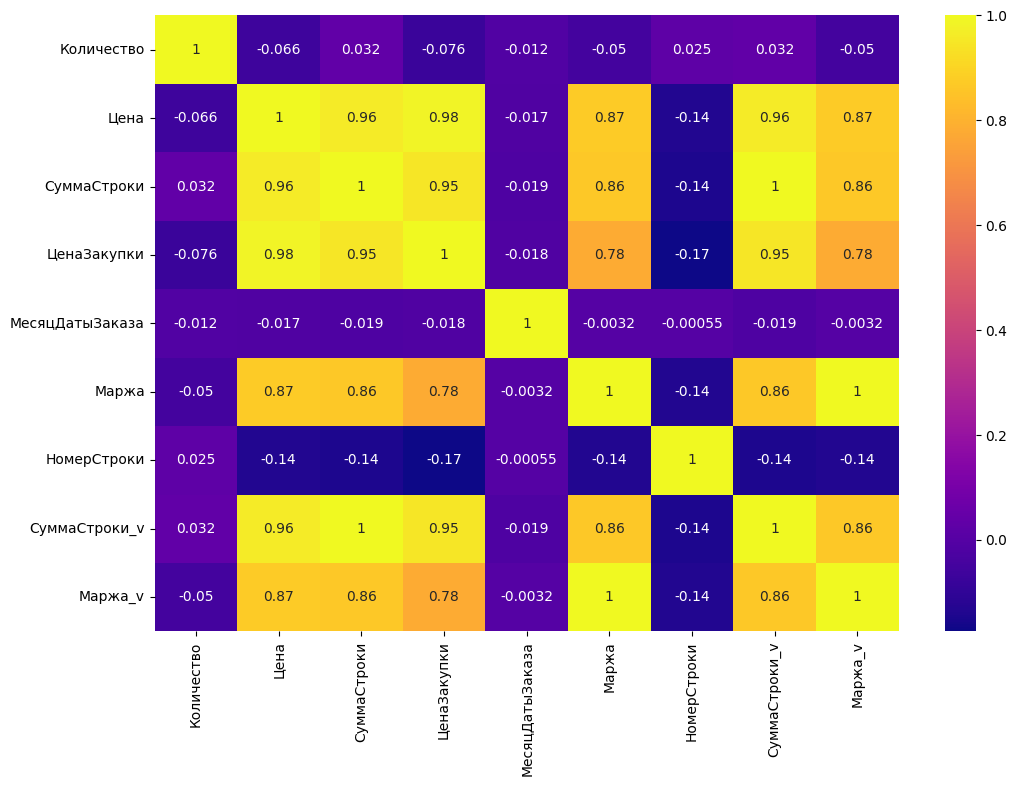

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(df.drop(['ДеньДаты','ГодДаты','МесяцДаты','ДеньНеделиДаты','ВремяОкруглДаты'],axis=1).corr(), annot=True, cmap=colormap);

In [ ]:
# Remove unnecessary columns
df.drop(['Маржа','СуммаСтроки'],axis=1, inplace=True)

## Remove canceled positions

In [ ]:
df['Отменено'].value_counts()
df = df[df['Отменено'] == 'Нет']

Нет    501987
Да      34716
Name: Отменено, dtype: int64

In [ ]:
df['НовыйСтатус'].value_counts()

Доставлен               247798
К отгрузке              178561
Возврат из ПВЗ           44864
Частичный возврат        14086
Отменен                   6876
Принят в ПВЗ              3932
Расформирован ПВЗ         2445
Скомплектован Регион      2390
Отменяется                 919
В резерве                   97
Передан в Регион            10
Отправлен в ПВЗ              7
Возврат                      1
Комплектация Регион          1
Name: НовыйСтатус, dtype: int64

<ipython-input-143-28f8f9c28b5a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

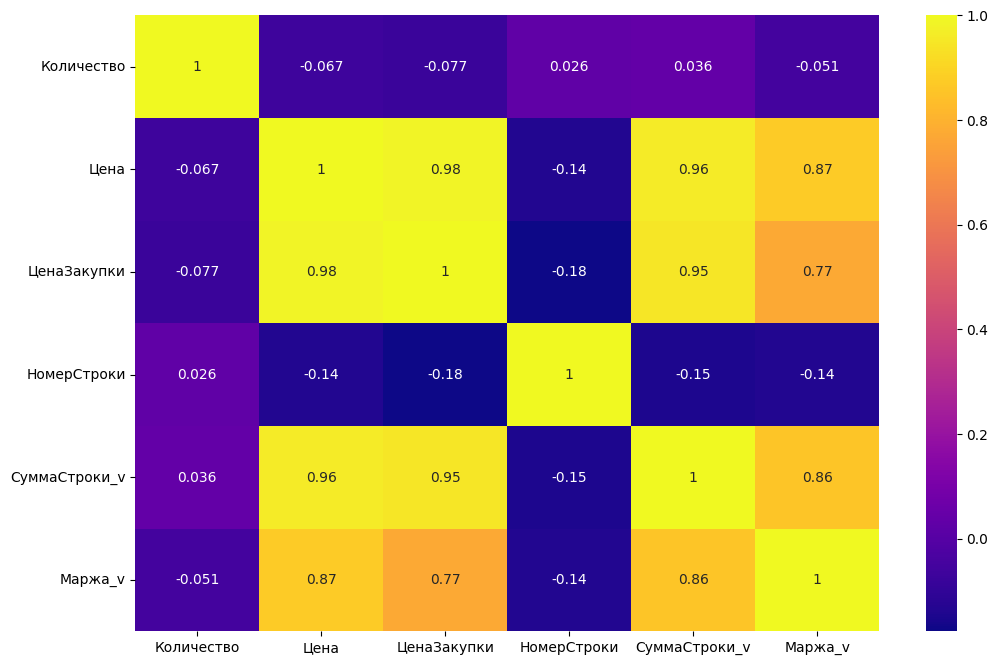

In [ ]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(df.drop(['ДеньДаты','ГодДаты','МесяцДаты', 'МесяцДатыЗаказа', 'ДеньНеделиДаты','ВремяОкруглДаты'],axis=1).corr(), annot=True, cmap=colormap)

Fill empty regions with a city of a shop




In [ ]:
# Fix region
df['Регион'] = df['Регион'].fillna(df['ГородМагазина'])
df = df[(df['Регион'] != '0')]

In [ ]:
df[df['ГородМагазина'] == '0']

,Дата,НомерЗаказаНаСайте,НовыйСтатус,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,Количество,Цена,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,Статус,Гео,НомерСтроки,ДатаЗаказаНаСайте,Телефон_new,ГородМагазина,МагазинЗаказа,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,ВремяОкруглДаты,СуммаСтроки_v,Маржа_v
0,2017-03-01 11:41:00,3998972_TR,Частичный возврат,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,1,680.0,172.00,3,2 017,Возврат,Москва,8,2017-02-28,55574854-48574951555577,0,NaN,2017,3,3,1,11:00:00,680.0,508.00
1,2017-03-01 12:22:00,3999117_TR,Доставлен,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,1,379.0,209.80,3,2 017,Доставлен,Регионы,3,2017-03-01,55575453-56535648535679,0,NaN,2017,3,3,1,12:00:00,379.0,169.20
2,2017-03-01 12:31:00,3999122_TR,Доставлен,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,1,3325.0,1149.00,3,2 017,Доставлен,Регионы,1,2017-03-01,55574950-57515657535772,0,NaN,2017,3,3,1,12:00:00,3325.0,2176.00
4,2017-03-01 11:38:00,3999411_TR,Доставлен,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,1,199.0,79.00,3,2 017,Доставлен,Регионы,3,2017-03-01,55574854-56495552515179,0,NaN,2017,3,3,1,11:00:00,199.0,120.00
5,2017-03-01 12:19:00,3999682_TR,К отгрузке,Москва,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Duplo, КОНСТРУКТОР Лошадки, (20 дет.)",МГТ,Нет,1,719.0,668.60,3,2 017,Доставлен,Москва,3,2017-03-01,55574851-53495753545674,0,NaN,2017,3,3,1,12:00:00,719.0,50.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,2017-04-17 09:54:00,4411156_TR,Принят в ПВЗ,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,КОЛЯСКИ КИТАЙ,КГТ,"BABYHIT, КОЛЯСКА (син/черн)",КГТ,Нет,1,3240.0,2700.00,4,2 017,В процессе,Регионы,1,2017-04-17,55574952-51535652495475,0,NaN,2017,4,1,17,09:00:00,3240.0,540.00
691535,2017-04-17 10:10:00,4411268_TR,Доставлен,Москва,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,прочие игрушки для развития,ИГРУШКИ,"TOMY LAMAZE, КНИЖКА- шуршалка Пират Пит",МГТ,Нет,1,464.0,324.80,4,2 017,Доставлен,Москва,2,2017-04-17,55575054-53545152544971,0,NaN,2017,4,1,17,10:00:00,464.0,139.20
691536,2017-04-17 11:03:00,4411571_TR,Доставлен,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, НАСАДКА для зубной щетки SonicPulsa...",МГТ,Нет,1,249.0,207.00,4,2 017,Доставлен,Регионы,1,2017-04-17,55575448-49564957485078,0,NaN,2017,4,1,17,11:00:00,249.0,42.00
691537,2017-04-17 11:03:00,4411571_TR,Доставлен,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,щетки зубные,ППКП,"CS MEDICA, ЩЕТКА зубная эл. SonicPulsar CS-562...",МГТ,Нет,1,849.0,705.00,4,2 017,Доставлен,Регионы,2,2017-04-17,55575448-49564957485078,0,NaN,2017,4,1,17,11:00:00,849.0,144.00


Within the dataset under investigation, a multitude of location-related variables were observed, including city designations, occasionally supplemented by neighborhood-level information. In an effort to foster data balance, the decision was made to amalgamate these location attributes into broader categories aligned with the Russian federal districts. This harmonization approach was employed to address the inherent disparity stemming from the prevalence of numerous smaller cities characterized by relatively limited order frequencies. By aggregating the dataset at the level of federal districts, the aim was to mitigate potential bias arising from the uneven distribution of orders across various urban centers.

In [ ]:
df_test = df
df_test['Регион'] = df_test['Регион'].replace(['Москва', 'Белгород', 'Владимир', 'Воронеж', 'Иваново', 'Калуга', 'Кострома', 'Курск', 'Липецк', 'Люберцы', 'Мытищи',
                                     'Подольск', 'Рязань', 'Сергиев Посад', 'Серпухов', 'Смоленск', 'Тамбов', 'Тверь', 'Тула', 'Ярославль'
                                     ], 'Центральный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Великий Новгород', 'Вологда', 'Воркута', 'Всеволожск', 'Выборг', 'Гатчина', 'Кингисепп', 'Кириши', 'Колпино', 'Мурманск',
                                     'Петрозаводск', 'Псков', 'Пушкин', 'Санкт-Петербург', 'Тихвин', 'Череповец'], 'Северо-Западный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Ижевск', 'Казань', 'Набережные Челны', 'Нижний Новгород', 'Новокуйбышевск', 'Пенза', 'Пермь', 'Самара', 'Саратов',
                                     'Тольятти', 'Ульяновск', 'Уфа', 'Чебоксары'], 'Приволжский ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Барнаул', 'Горно-Алтайск', 'Иркутск', 'Кемерово', 'Красноярск', 'Новокузнецк', 'Новосибирск', 'Омск', 'Томск',
                                               'Барнаул', "Бийск", "Рубцовск", "Новоалтайск"], 'Сибирский ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Волгоград', 'Краснодар', 'Новочеркасск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 'Ставрополь'], 'Южный ф.о.')
df_test['Регион'] = df_test['Регион'].replace(['Екатеринбург', 'Нижневартовск', 'Нижний Тагил', 'Ноябрьск', 'Сургут', 'Тюмень', 'Челябинск'], 'Уральский ф.о.')
df_test['Регион'] = df_test['Регион'].replace({'Владивосток': 'Дальневосточный ф.о.'})

df_test['Регион'] = df_test['Регион'].replace({
    'Красногорск (Красногорский район)': 'Центральный ф.о.',
    'Коломна (Московская область район)': 'Центральный ф.о.',
    'Серпухов (Московская область район)': 'Центральный ф.о.',
    'Ступино (Ступинский район)': 'Центральный ф.о.',
    'Черкесск': 'Южный ф.о.',
    'Клин (Клинский район)': 'Центральный ф.о.',
    'Сергиев Посад (Сергиево-Посадский район)': 'Центральный ф.о.',
    'Геленджик': 'Южный ф.о.',
    'Подольск (Московская область район)': 'Центральный ф.о.',
    'Люберцы (Люберецкий район)': 'Центральный ф.о.',
    'Волжский': 'Южный ф.о.',
    'Дубна (Московская область район)': 'Центральный ф.о.',
    'Волоколамск (Волоколамский район)': 'Центральный ф.о.',
    'Орск': 'Южный ф.о.',
    'Краснокаменск': 'Сибирский ф.о.',
    'Одинцово (Одинцовский район)': 'Центральный ф.о.',
    'Жуковский (Московская область район)': 'Центральный ф.о.',
    'Внуково (Волоколамский район)': 'Центральный ф.о.',
    'Орёл': 'Центральный ф.о.',
    'Йошкар-Ола': 'Приволжский ф.о.',
    'Старый Оскол': 'Центральный ф.о.',
    'Тобольск': 'Уральский ф.о.',
    'Мытищи (Мытищинский район)': 'Центральный ф.о.',
    'Новомосковск': 'Центральный ф.о.',
    'Котельники (Люберецкий район)': 'Центральный ф.о.',
    'Раменское (Раменский район)': 'Центральный ф.о.',
    'Архангельск': 'Северо-Западный ф.о.',
    'Коммунарка (Ленинский район)': 'Центральный ф.о.'})

df_test['Регион'] = df_test['Регион'].replace({
    'Астрахань': 'Южный ф.о.',
    'Новое Подвязново (Ногинский район)': 'Центральный ф.о.',
    'Павловский Посад (Павлово-Посадский район)': 'Центральный ф.о.',
    'Королев (Московская область район)': 'Центральный ф.о.',
    'Балашиха (Балашихинский район)': 'Центральный ф.о.',
    'Селятино (Наро-Фоминский район)': 'Центральный ф.о.',
    'Старая Купавна (Ногинский район)': 'Центральный ф.о.',
    'Оренбург': 'Приволжский ф.о.',
    'Чита': 'Сибирский ф.о.',
    'Железнодорожный (Московская область район)': 'Центральный ф.о.',
    'Ногинск (Ногинский район)': 'Центральный ф.о.',
    'Воскресенск (Воскресенский район)': 'Центральный ф.о.',
    'Балаково': 'Южный ф.о.',
    'Дзержинский (Московская область район)': 'Центральный ф.о.',
    'Севастополь': 'Южный ф.о.',
    'Истра (Истринский район)': 'Центральный ф.о.',
    'Киров': 'Приволжский ф.о.',
    'Электросталь (Московская область район)': 'Центральный ф.о.',
    'Пушкино (Пушкинский район)': 'Центральный ф.о.',
    'Долгопрудный (Московская область район)': 'Центральный ф.о.',
    'Видное (Ленинский район)': 'Центральный ф.о.',
    'Орехово-Зуево (Московская область район)': 'Центральный ф.о.',
    'Томилино (Люберецкий район)': 'Центральный ф.о.',
    'Стерлитамак': 'Приволжский ф.о.',
    'Реутов (Московская область район)': 'Центральный ф.о.',
    'Химки (Московская область район)': 'Центральный ф.о.'})


df_test['Регион'] = df_test['Регион'].replace({
    'Щербинка (Московская область район)': 'Центральный ф.о.',
    'Дзержинск': 'Приволжский ф.о.',
    'Благовещенск': 'Дальневосточный ф.о.',
    'Домодедово (Домодедовский район)': 'Центральный ф.о.',
    'Дмитров (Дмитровский район)': 'Центральный ф.о.',
    'Таганрог': 'Южный ф.о.',
    'Брянск': 'Центральный ф.о.',
    'Ковров': 'Центральный ф.о.',
    'Кожухово (Люберецкий район)': 'Центральный ф.о.',
    'Хабаровск': 'Дальневосточный ф.о.',
    'Солнечногорск (Солнечногорский район)': 'Центральный ф.о.',
    'Путилково (Красногорский район)': 'Центральный ф.о.',
    'Мосрентген (Ленинский район)': 'Центральный ф.о.',
    'Добрянка': 'Приволжский ф.о.',
    'Михайловск': 'Приволжский ф.о.',
    'Лобня (Московская область район)': 'Центральный ф.о.',
    'Троицк (ГП Москва)': 'Центральный ф.о.',
    'Щелково (Щелковский район)': 'Центральный ф.о.',
    'Чулково (Раменский район)': 'Центральный ф.о.',
    'Можайск (Можайский район)': 'Центральный ф.о.',
    'Шатура (Шатурский район)': 'Центральный ф.о.',
    'Улан-Удэ': 'Сибирский ф.о.',
    'Волгодонск': 'Южный ф.о.',
    'Салтыковка (Балашихинский район)': 'Центральный ф.о.',
    'Юбилейный (Московская область район)': 'Центральный ф.о.',
    'Голицыно (Одинцовский район)': 'Центральный ф.о.',
    'Каменск-Уральский': 'Уральский ф.о.',
    'Митино (Волоколамский район)': 'Центральный ф.о.'})

df_test['Регион'] = df_test['Регион'].replace({
    'Луховицы (Луховицкий район)': 'Центральный ф.о.',
    'Купавна (Талдомский район)': 'Центральный ф.о.',
    'Кандалакша': 'Северо-Западный ф.о.',
    'Ивантеевка (Московская область район)': 'Центральный ф.о.',
    'Саранск': 'Приволжский ф.о.',
    'Софрино (Пушкинский район)': 'Центральный ф.о.',
    'Ухта': 'Северный ф.о.',
    'Немчиновка (Одинцовский район)': 'Центральный ф.о.',
    'Симферополь': 'Южный ф.о.',
    'Новороссийск': 'Южный ф.о.',
    'Армавир': 'Южный ф.о.',
    'Дрожжино (Ленинский район)': 'Центральный ф.о.',
    'Нахабино (Красногорский район)': 'Центральный ф.о.',
    'Боровск': 'Центральный ф.о.',
    'Якутск': 'Дальневосточный ф.о.',
    'Электрогорск (Павлово-Посадский район)': 'Центральный ф.о.',
    'Обнинск': 'Центральный ф.о.',
    'Димитровград': 'Приволжский ф.о.',
    'Глазов': 'Приволжский ф.о.',
    'Сызрань': 'Приволжский ф.о.',
    'Звенигород (Московская область район)': 'Центральный ф.о.',
    'Чехов (Чеховский район)': 'Центральный ф.о.',
    'Руза (Рузский район)': 'Центральный ф.о.',
    'Миасс': 'Уральский ф.о.',
    'Наро-Фоминск (Наро-Фоминский район)': 'Центральный ф.о.'
})


df_test['Регион'] = df_test['Регион'].replace({
    'Магадан': 'Дальневосточный ф.о.',
    'Усинск': 'Северо-Западный ф.о.',
    'Новопокровская (Краснодарский край)': 'Южный ф.о.',
    'Электроугли (Ногинский район)': 'Центральный ф.о.',
    'Красково (Люберецкий район)': 'Центральный ф.о.',
    'Адлер': 'Южный ф.о.',
    'Рассказово': 'Центральный ф.о.',
    'Ознобишино (Подольский район)': 'Центральный ф.о.',
    'Владикавказ': 'Северо-Кавказский ф.о.',
    'Железноводск': 'Северо-Кавказский ф.о.',
    'Серебряные Пруды (Серебряно-Прудский район)': 'Центральный ф.о.',
    'Анапа': 'Южный ф.о.',
    'Бутово (Ленинский район)': 'Центральный ф.о.',
    'Знамя Октября (Подольский район)': 'Центральный ф.о.',
    'Калининград': 'Северо-Западный ф.о.',
    'Лангепас': 'Уральский ф.о.',
    'Шахты': 'Южный ф.о.',
    'Лосино-Петровский (Щелковский район)': 'Центральный ф.о.',
    'Малаховка (Люберецкий район)': 'Центральный ф.о.',
    'Норильск': 'Сибирский ф.о.',
    'Махачкала': 'Северо-Кавказский ф.о.'
})





df_test['Регион'] = df_test['Регион'].replace({
    'Галич': 'Центральный ф.о.',
    'Нефтеюганск': 'Уральский ф.о.',
    'Биокомбината (Щелковский район)': 'Центральный ф.о.',
    'Кирово-Чепецк': 'Приволжский ф.о.',
    'Софьино (Раменский район)': 'Центральный ф.о.',
    'Лыткарино (Московская область район)': 'Центральный ф.о.',
    'Пирогово (Мытищинский район)': 'Центральный ф.о.',
    'Боровичи': 'Северо-Западный ф.о.',
    'Апрелевка (Наро-Фоминский район)': 'Центральный ф.о.',
    'Алапаевск': 'Уральский ф.о.',
    'Петропавловск-Камчатский': 'Дальневосточный ф.о.',
    'Муром': 'Центральный ф.о.',
    'Касимов': 'Центральный ф.о.',
    'Свердловский (Щелковский район)': 'Центральный ф.о.',
    'Краснознаменск (Московская область район)': 'Центральный ф.о.',
    'Ханты-Мансийск': 'Уральский ф.о.',
    'Невинномысск': 'Северо-Кавказский ф.о.',
    'Ильский (Краснодарская область)': 'Южный ф.о.',
    'Грозный': 'Северо-Кавказский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Южно-Сахалинск': 'Дальневосточный ф.о.',
    'Сарапул': 'Приволжский ф.о.',
    'Березники': 'Приволжский ф.о.',
    'Полысаево': 'Сибирский ф.о.',
    'Бронницы (Московская область район)': 'Центральный ф.о.',
    'Солманово (Одинцовский район)': 'Центральный ф.о.',
    'Егорьевск (Егорьевский район)': 'Центральный ф.о.',
    'Марусино (Люберецкий район)': 'Центральный ф.о.',
    'Монино (Щелковский район)': 'Центральный ф.о.',
    'Ессентукская (Ставропольский край)': 'Северо-Кавказский ф.о.',
    'Мытищи 16 (Мытищинский район)': 'Центральный ф.о.',
    'Печора': 'Северо-Западный ф.о.',
    'Рыбинск': 'Центральный ф.о.',
    'Успенское (Одинцовский район)': 'Центральный ф.о.',
    'Барвиха (Одинцовский район)': 'Центральный ф.о.',
    'Сатка': 'Уральский ф.о.',
    'Дедовск (Истринский район)': 'Центральный ф.о.',
    'Кубинка (Одинцовский район)': 'Центральный ф.о.',
    'Тимашёвск': 'Южный ф.о.',
    'Копейск': 'Уральский ф.о.',
    'Куровское (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Крымск': 'Южный ф.о.',
    'Люберцы-2 (Люберецкий район)': 'Центральный ф.о.',
    'Зеленоград': 'Центральный ф.о.',
    'Сыктывкар': 'Северо-Западный ф.о.',
    'Гуково': 'Южный ф.о.',
    'Баковка (Одинцовский район)': 'Центральный ф.о.',
    'Совхоз им Ленина (Ленинский район)': 'Центральный ф.о.',
    'Правдинский (Пушкинский район)': 'Центральный ф.о.'})



df_test['Регион'] = df_test['Регион'].replace({
    'Чиверево (Мытищинский район)': 'Центральный ф.о.',
    'Архангельское (Красногорский район)': 'Центральный ф.о.',
    'Суханово (Ленинский район)': 'Центральный ф.о.',
    'Демихово (Демиховское с/п) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Нальчик': 'Северо-Кавказский ф.о.',
    'Пироговский (Мытищинский район)': 'Центральный ф.о.',
    'Туапсе': 'Южный ф.о.',
    'ВНИИССОК (Одинцовский район)': 'Центральный ф.о.',
    'Московский (Ленинский район)': 'Центральный ф.о.',
    'Костомукша': 'Северо-Западный ф.о.',
    'Брехово (Солнечногорский район)': 'Центральный ф.о.',
    'Зеленокумск': 'Северо-Кавказский ф.о.',
    'Булатниково (Ленинский район)': 'Центральный ф.о.',
    'Ерино (Подольский район)': 'Центральный ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Сосенки (Ленинский район)': 'Центральный ф.о.',
    'Североморск': 'Северо-Западный ф.о.',
    'Кашира (Каширский район)': 'Центральный ф.о.',
    'Сухой Лог': 'Уральский ф.о.',
    'Торжок': 'Центральный ф.о.',
    'Чапаевск': 'Приволжский ф.о.',
    'Ессентуки': 'Северо-Кавказский ф.о.',
    'Элиста': 'Южный ф.о.',
    'Каспийск': 'Южный ф.о.',
    'Заречье (Одинцовский район)': 'Центральный ф.о.',
    'Азов': 'Южный ф.о.',
    'Новошахтинск': 'Южный ф.о.',
    'Новинки (Истринский район)': 'Центральный ф.о.',
    'Истра (Красногорский район)': 'Центральный ф.о.',
    'Молоково (Ленинский район)': 'Центральный ф.о.',
    'Новоивановское (Одинцовский район)': 'Центральный ф.о.',
    'Александровка (Красногорский район)': 'Центральный ф.о.',
    'Мотяково (Люберецкий район)': 'Центральный ф.о.',
    'Елизово': 'Дальневосточный ф.о.',
    'Захарково (Красногорский район)': 'Центральный ф.о.',
    'Силикат (Люберецкий район)': 'Центральный ф.о.',
    'Веледниково (Истринский район)': 'Центральный ф.о.',
    'Давыдово (Давыдовское с/п) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Вялки (Раменский район)': 'Центральный ф.о.',
    'Боброво (Ленинский район)': 'Центральный ф.о.',
    'Заря (Балашихинский район)': 'Центральный ф.о.',
    'Кстово': 'Приволжский ф.о.',
    'Клязьма (Пушкинский район)': 'Центральный ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Протвино (Московская область район)': 'Центральный ф.о.',
    'Бузулук': 'Приволжский ф.о.',
    'Озеры (Озерский район)': 'Центральный ф.о.',
    'Тихорецк': 'Южный ф.о.',
    'Павловская (Краснодарский край)': 'Южный ф.о.',
    'Яблоновский': 'Южный ф.о.',
    'Птичное (Наро-Фоминский район)': 'Центральный ф.о.',
    'Ейск': 'Южный ф.о.',
    'Рождествено (Истринский район)': 'Центральный ф.о.',
    'Воскресенское (Каширский район)': 'Центральный ф.о.',
    'Овражки (Люберецкий район)': 'Центральный ф.о.',
    'Георгиевск': 'Северо-Кавказский ф.о.',
    'Среднеуральск': 'Уральский ф.о.',
    'Грайворон': 'Центральный ф.о.',
    'Братск': 'Сибирский ф.о.',
    'Альметьевск': 'Приволжский ф.о.',
    'Новый Уренгой': 'Дальневосточный ф.о.',
    'Вязьма': 'Центральный ф.о.',
    'Михнево (Домодедовский район)': 'Центральный ф.о.',
    'Белово': 'Сибирский ф.о.',
    'Лунево (Солнечногорский район)': 'Центральный ф.о.',
    'Калач-на-Дону': 'Южный ф.о.',
    'Михнево (Ступинский район)': 'Центральный ф.о.',
    'Городище': 'Центральный ф.о.',
    'Ромашково (Одинцовский район)': 'Центральный ф.о.',
    'Полтево (Балашихинский район)': 'Центральный ф.о.',
    'Кисловодск': 'Северо-Кавказский ф.о.',
    '1 Мая (Балашихинский район)': 'Центральный ф.о.',
    'Новоуральск': 'Уральский ф.о.',
    'Борисоглебск': 'Центральный ф.о.',
    'Ачинск': 'Сибирский ф.о.',
    'Волжск': 'Приволжский ф.о.',
    'Тосно': 'Северо-Западный ф.о.',
    'Гулькевичи': 'Южный ф.о.',
    'Верхняя Салда': 'Уральский ф.о.',
    'Энгельс': 'Приволжский ф.о.',
    'Климовск (Московская область район)': 'Центральный ф.о.',
    'Первоуральск': 'Уральский ф.о.',
    'Новокубанск': 'Южный ф.о.',
    'Гаврилов-Ям': 'Центральный ф.о.',
    'Серов': 'Уральский ф.о.',
    'Светлоград': 'Южный ф.о.',
    'Кунгур': 'Приволжский ф.о.',
    'Абакан': 'Сибирский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Фрязино (Московская область район)': 'Центральный ф.о.',
    'Лебедянь': 'Центральный ф.о.',
    'Елец': 'Центральный ф.о.',
    'Россошь': 'Центральный ф.о.',
    'Ликино-Дулево (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Снегири (Истринский район)': 'Центральный ф.о.',
    'Нововоронеж': 'Центральный ф.о.',
    'Ленинск-Кузнецкий': 'Сибирский ф.о.',
    'Троицк (Челябинская область)': 'Уральский ф.о.',
    'Апатиты': 'Северо-Западный ф.о.',
    'Березовский (Свердловская область)': 'Уральский ф.о.',
    'Спасск-Дальний': 'Дальневосточный ф.о.',
    'Черноголовка (Ногинский район)': 'Центральный ф.о.',
    'Арзамас': 'Приволжский ф.о.',
    'Саларьево (Ленинский район)': 'Центральный ф.о.',
    'Салават': 'Приволжский ф.о.',
    'Часовня (Люберецкий район)': 'Центральный ф.о.',
    'Лесной': 'Уральский ф.о.',
    'Дроздово (Ленинский район)': 'Центральный ф.о.',
    'Сосновый Бор': 'Северо-Западный ф.о.',
    'Красный Сулин': 'Южный ф.о.',
    'Аксай': 'Южный ф.о.',
    'Прокопьевск': 'Сибирский ф.о.',
    'Развилка (Ленинский район)': 'Центральный ф.о.',
    'Ржев': 'Центральный ф.о.',
    'Партизанск': 'Дальневосточный ф.о.',
    'Майский': 'Приволжский ф.о.',
    'Павловск (Воронежская обл.)': 'Центральный ф.о.',
    'Виноградово (Воскресенский район)': 'Центральный ф.о.',
    'Камышин': 'Южный ф.о.',
    'Приволжск': 'Приволжский ф.о.',
    'Федюково (Подольский район)': 'Центральный ф.о.',
    'Магнитогорск': 'Уральский ф.о.',
    'Кинель': 'Приволжский ф.о.',
    'Мелеуз': 'Приволжский ф.о.',
    'Соликамск': 'Приволжский ф.о.',
    'Полевской': 'Уральский ф.о.',
    'Глухово (Красногорский район)': 'Центральный ф.о.'
})


df_test['Регион'] = df_test['Регион'].replace({
    'Великие Луки': 'Северо-Западный ф.о.',
    'Вешки (Мытищинский район)': 'Центральный ф.о.',
    'Каневская (Краснодарский край)': 'Южный ф.о.',
    'Белоозерский (Воскресенский район)': 'Центральный ф.о.',
    'Кореновск': 'Южный ф.о.',
    'Островцы (Раменский район)': 'Центральный ф.о.',
    'Батайск': 'Южный ф.о.',
    'Петрово-Дальнее (Красногорский район)': 'Центральный ф.о.',
    'Переславль-Залесский': 'Центральный ф.о.',
    'Мыски': 'Сибирский ф.о.',
    'Фурманов': 'Центральный ф.о.',
    'Октябрьский': 'Приволжский ф.о.',
    'Майкоп': 'Южный ф.о.',
    'Юрьевец': 'Центральный ф.о.',
    'Александров': 'Центральный ф.о.',
    'Усть-Илимск': 'Сибирский ф.о.',
    'Ильинское (Красногорский район)': 'Центральный ф.о.',
    'Белореченск': 'Южный ф.о.',
    'Отрадное': 'Северо-Западный ф.о.',
    'Сальск': 'Южный ф.о.',
    'Щёкино': 'Центральный ф.о.',
    'Северодвинск': 'Северо-Западный ф.о.',
    'Сковородино': 'Дальневосточный ф.о.',
    'Балахна': 'Приволжский ф.о.',
    'Красноармейск (Московская область район)': 'Центральный ф.о.',
    'Мичуринск': 'Центральный ф.о.',
    'Уссурийск': 'Дальневосточный ф.о.',
    'Саяногорск': 'Сибирский ф.о.',
    'Икша (Дмитровский район)': 'Центральный ф.о.',
    'Ватутинки (Ленинский район)': 'Центральный ф.о.'
})


df_test['Регион'] = df_test['Регион'].replace({
    'Городец': 'Приволжский ф.о.',
    'Калининец (Наро-Фоминский район)': 'Центральный ф.о.',
    'Картино (Ленинский район)': 'Центральный ф.о.',
    'Горки Ленинские (Домодедовский район)': 'Центральный ф.о.',
    'Подольсклесхоз (Подольский район)': 'Центральный ф.о.',
    'Раменки (Егорьевский район)': 'Центральный ф.о.',
    'Володарского (Ленинский район)': 'Центральный ф.о.',
    'Можга': 'Приволжский ф.о.',
    'Яхрома (Дмитровский район)': 'Центральный ф.о.',
    'Жирновск': 'Южный ф.о.',
    'Черкизово (Пушкинский район)': 'Центральный ф.о.',
    'Бердск': 'Сибирский ф.о.',
    'Горячий Ключ': 'Южный ф.о.',
    'Полярные Зори': 'Северо-Западный ф.о.',
    'Лиски': 'Центральный ф.о.',
    'Железногорск': 'Сибирский ф.о.',
    'Столбовая (Чеховский район)': 'Центральный ф.о.',
    'Сапроново (Ленинский район)': 'Центральный ф.о.',
    'Павлово (Нижегородская область)': 'Приволжский ф.о.',
    'Быково (Подольский район)': 'Центральный ф.о.',
    'Североуральск': 'Уральский ф.о.',
    'Углич': 'Центральный ф.о.',
    'Борзя': 'Дальневосточный ф.о.',
    'Талдом (Талдомский район)': 'Центральный ф.о.',
    'Красноуфимск': 'Уральский ф.о.',
    'Нижнекамск': 'Приволжский ф.о.',
    'Удельная (Раменский район)': 'Центральный ф.о.',
    'Киевский (Наро-Фоминский район)': 'Центральный ф.о.',
    'Дрезна-2 (Горбачихинский с/о) (Орехово-Зуевский район)': 'Центральный ф.о.',
    'Мечникова (Красногорский район)': 'Центральный ф.о.',
    'Котельниково': 'Южный ф.о.',
    'Канск': 'Сибирский ф.о.',
    'Малоярославец': 'Центральный ф.о.',
    'Златоуст': 'Уральский ф.о.',
    'Константиново (Раменский район)': 'Центральный ф.о.',
    'Кыштым': 'Уральский ф.о.',
    'Гай': 'Приволжский ф.о.',
    'Котлас': 'Северо-Западный ф.о.',
    'Будённовск': 'Южный ф.о.',
    'Марьино (Ленинский район)': 'Центральный ф.о.',
    'Пыть-Ях': 'Сибирский ф.о.',
    'Нефтекамск': 'Приволжский ф.о.',
    'Минеральные Воды': 'Южный ф.о.',
    'Лермонтов': 'Южный ф.о.',
    'Бугульма': 'Приволжский ф.о.',
    'Чусовой': 'Приволжский ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Жостово (Мытищинский район)': 'Центральный ф.о.',
    'Малые Вяземы (Одинцовский район)': 'Центральный ф.о.',
    'Кировск (Ленинградская область)': 'Северо-Западный ф.о.',
    'Новоглаголево (Наро-Фоминский район)': 'Центральный ф.о.',
    'Балашов': 'Приволжский ф.о.',
    'Нерехта': 'Центральный ф.о.',
    'Кратово (Раменский район)': 'Центральный ф.о.',
    'Мисайлово (Ленинский район)': 'Центральный ф.о.',
    'Усово-Тупик (Одинцовский район)': 'Центральный ф.о.',
    'Куркино (Шаховской район)': 'Центральный ф.о.',
    'Грязи': 'Центральный ф.о.',
    'Губкин': 'Центральный ф.о.',
    'Белая Калитва': 'Южный ф.о.',
    'Кольчугино': 'Центральный ф.о.',
    'Славянск-на-Кубани': 'Южный ф.о.',
    'Минусинск': 'Сибирский ф.о.',
    'Усть-Кут': 'Сибирский ф.о.',
    'Выкса': 'Приволжский ф.о.',
    'Оса': 'Приволжский ф.о.',
    'Ряжск': 'Центральный ф.о.',
    'Ногинск-9 (Ногинский район)': 'Центральный ф.о.',
    'Грибки (Мытищинский район)': 'Центральный ф.о.',
    'Балобаново (Ногинский район)': 'Центральный ф.о.',
    'Ангелово (Красногорский район)': 'Центральный ф.о.',
    'Рошаль (Московская область район)': 'Центральный ф.о.',
    'Лесные Поляны (Пушкинский район)': 'Центральный ф.о.',
    'Новотроицк': 'Уральский ф.о.',
    'Ногинск-5 (Ногинский район)': 'Центральный ф.о.',
    'Кола': 'Северо-Западный ф.о.',
    'Курганинск': 'Южный ф.о.',
    'Карпово (Раменский район)': 'Центральный ф.о.',
    'Остров': 'Северо-Западный ф.о.',
    'Авиационный (Домодедовский район)': 'Центральный ф.о.',
    'Адыгейск': 'Южный ф.о.',
    'Ангарск': 'Сибирский ф.о.'
})



df_test['Регион'] = df_test['Регион'].replace({
    'Ховрино (Мытищинский район)': 'Центральный ф.о.',
    'Щемилово (Ногинский район)': 'Центральный ф.о.',
    'Бокситогорск': 'Северо-Западный ф.о.',
    'Погорелки (Мытищинский район)': 'Центральный ф.о.',
    'Старощербиновская (Краснодарский край)': 'Южный ф.о.',
    'Богородицк': 'Центральный ф.о.',
    'Новосельцево (Мытищинский район)': 'Центральный ф.о.',
    'Химки': 'Центральный ф.о.',
    'Грибаново (Красногорский район)': 'Центральный ф.о.',
    'Быково (Раменский район)': 'Центральный ф.о.',
    'Троицкое (Мытищинский район)': 'Центральный ф.о.',
    'Мартемьяново (Наро-Фоминский район)': 'Центральный ф.о.',
    'Усть-Лабинск': 'Южный ф.о.',
    'Ясногорск': 'Центральный ф.о.',
    'Реутов': 'Центральный ф.о.',
    'Кузнецк': 'Приволжский ф.о.',
    'Долгопрудный': 'Центральный ф.о.',
    'Королев': 'Центральный ф.о.',
    'Коломна-1 (Коломенский район)': 'Центральный ф.о.',
    'Румянцево (Истринский район)': 'Центральный ф.о.',
    'Алабушево (Солнечногорский район)': 'Центральный ф.о.',
    'Енисейск': 'Сибирский ф.о.',
    'Тучково СТ (Рузский район)': 'Центральный ф.о.',
    'Заречный (Свердловская область)': 'Уральский ф.о.',
    'Ульянково (Мытищинский район)': 'Центральный ф.о.',
    'Северск': 'Сибирский ф.о.',
    'Юрга': 'Сибирский ф.о.',
    'Новодрожжино (Ленинский район)': 'Центральный ф.о.',
    'Белоярский': 'Сибирский ф.о.',
    'Мильково (Ленинский район)': 'Центральный ф.о.',
    'Поярково (Солнечногорский район)': 'Центральный ф.о.',
    'Муриково (Шаховской район)': 'Центральный ф.о.'
})

df_test['Регион'] = df_test['Регион'].replace({
    'Старый': 'Центральный ф.о.',
    'Жуковский': 'Центральный ф.о.',
    'Нижний': 'Приволжский ф.о.',
    'Орехово-Зуево': 'Центральный ф.о.',
    'Орел': 'Центральный ф.о.',
    'Красногорск': 'Центральный ф.о.',
    'Ногинск': 'Центральный ф.о.',
    'Дубна': 'Центральный ф.о.',
    'Северный ф.о.': 'Северо-Западный ф.о.',
    'Железнодорожный': 'Центральный ф.о.',
    'Павловский': 'Центральный ф.о.',
    'Клин': 'Центральный ф.о.',
    'Набережные': 'Приволжский ф.о.',
    'Электросталь': 'Центральный ф.о.',
    'Сергиев': 'Центральный ф.о.',
    'Коломна': 'Центральный ф.о.'
})


In [ ]:
correct_fo = list((df_test['Регион'].value_counts()[df_test['Регион'].value_counts() >= 32]).keys())

In [ ]:
correct_fo

['Центральный ф.о.',
 'Приволжский ф.о.',
 'Северо-Западный ф.о.',
 'Южный ф.о.',
 'Сибирский ф.о.',
 'Уральский ф.о.',
 'Дальневосточный ф.о.',
 'Северо-Кавказский ф.о.']

In [ ]:
df_test = df_test[df_test['Регион'].isin(correct_fo)]

In [ ]:
px.pie(value_counts_to_df(df_test['Регион']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
df = df_test

Delivered orders

In [ ]:
df['Статус'].value_counts()

Доставлен       425809
Возврат          58855
Отменен           9296
В процессе        6436
Не определен       919
Name: Статус, dtype: int64

In [ ]:
px.pie(value_counts_to_df(df['Статус']) , values='count', names='category',
             color_discrete_sequence=colors).show()

In [ ]:
df.shape

(501315, 30)

In [ ]:
df['НовыйСтатус'].value_counts()
df = df[df['НовыйСтатус'] !='Отменяется']

Доставлен               247686
К отгрузке              178123
Возврат из ПВЗ           44840
Частичный возврат        14014
Отменен                   6854
Принят в ПВЗ              3932
Расформирован ПВЗ         2442
Скомплектован Регион      2390
Отменяется                 919
В резерве                   96
Передан в Регион            10
Отправлен в ПВЗ              7
Возврат                      1
Комплектация Регион          1
Name: НовыйСтатус, dtype: int64

In [ ]:
px.pie(value_counts_to_df(df['НовыйСтатус']), values='count', names='category',
             color_discrete_sequence=colors).show()

Save the datasets

In [ ]:
df.shape

(500396, 30)

In [ ]:
df2 = df.groupby('Группа2').sum().reset_index()
df3 = df.groupby('Регион').sum().reset_index()


<ipython-input-167-8b561bc17cf8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-167-8b561bc17cf8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df2

,Группа2,Количество,Цена,ЦенаЗакупки,МесяцДатыЗаказа,НомерСтроки,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,СуммаСтроки_v,Маржа_v
0,ДЕТСКОЕ ПИТАНИЕ,300109,1.576938e+07,14670786.27,350636,820304,203132070,350636,374200,1511220,3.865765e+07,2363646.85
1,ЖЕНСКИЕ ШТУЧКИ,826,9.547500e+04,34708.53,2560,5965,1474427,2560,2479,11053,1.077490e+05,54592.57
2,ИГРУШКИ,91460,5.812973e+07,45106333.49,301860,382219,173284504,301860,319955,1378197,5.960739e+07,12975938.64
3,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",23014,3.621474e+06,2774306.41,66115,144614,37849005,66115,70962,282138,3.829586e+06,833374.58
4,КОСМЕТИКА/ГИГИЕНА,49721,7.808515e+06,6502356.39,135705,275333,78846547,135705,138377,571682,9.243974e+06,1517944.44
5,КРУПНОГАБАРИТНЫЙ ТОВАР,27143,1.369486e+08,94721854.93,92930,53265,53583622,92930,106891,409997,1.380124e+08,42177703.99
6,ОБУВЬ,12916,1.478544e+07,9676069.00,44064,35764,25688512,44064,49657,193216,1.488703e+07,5127959.91
7,ПОДГУЗНИКИ,64183,4.706990e+07,45621974.34,159566,123724,92882850,159566,166548,663335,6.444649e+07,2476779.01
8,СОПУТСТВУЮЩИЕ ТОВАРЫ,994,2.933814e+05,182423.66,2950,4455,1785045,2950,3091,14877,3.094218e+05,99481.89
9,"ТЕКСТИЛЬ, ТРИКОТАЖ",69727,4.881439e+07,31760539.70,244037,351964,136532747,244037,240004,1025374,4.935243e+07,17201330.99


In [ ]:
df3['Маржа_per_capita'] = df3['Маржа_v']/df3['Количество']

In [ ]:
px.bar(df3.sort_values('Маржа_per_capita'), x='Маржа_per_capita', y='Регион',
            ).show()

In [ ]:
colormap

'plasma'

In [ ]:
fig = px.bar(df2.sort_values('Маржа_v'), x='Маржа_v', y='Группа2',)

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})



In [ ]:
# Save the whole dataset without canceled items
df = df.reset_index()
df.to_csv('dataset_clean.csv',encoding='utf-8',index=False)

# Save the subset of the dataset of positions that were purchased
df_delivered = df[df['Статус']=='Доставлен']
df_delivered = df_delivered.reset_index()
df_delivered.to_csv('dataset_delivered.csv',encoding='utf-8',index=False)

# Save the subset with filled phones
df_w_phones = df[~df['Телефон_new'].isna()]
df_w_phones = df_w_phones.reset_index()
df_w_phones.to_csv('dataset_phones.csv',encoding='utf-8',index=False)

In [ ]:
df.describe()

,index,Количество,Цена,ЦенаЗакупки,МесяцДатыЗаказа,НомерСтроки,ГодДаты,МесяцДаты,ДеньНеделиДаты,ДеньДаты,СуммаСтроки_v,Маржа_v
count,500396.000000,500396.000000,500396.000000,428195.000000,500396.000000,500396.000000,500396.0,500396.000000,500396.000000,500396.000000,500396.000000,428195.000000
mean,348458.192536,1.505620,713.731763,616.376464,3.512096,4.853658,2017.0,3.512096,3.699512,15.312231,806.552903,203.069380
std,200194.877885,2.065406,1947.911321,1546.292269,0.499854,6.571233,0.0,0.499854,1.890313,8.503951,2034.034592,650.664221
min,0.000000,1.000000,1.000000,0.910000,3.000000,1.000000,2017.0,3.000000,1.000000,1.000000,1.000000,-11961.730000
25%,179474.750000,1.000000,76.080000,64.570000,3.000000,1.000000,2017.0,3.000000,2.000000,8.000000,99.000000,11.320000
50%,346995.500000,1.000000,191.000000,176.000000,4.000000,2.000000,2017.0,4.000000,4.000000,15.000000,234.980000,45.960000
75%,525802.250000,1.000000,641.115000,608.220000,4.000000,6.000000,2017.0,4.000000,5.000000,22.000000,720.000000,151.620000
max,691538.000000,180.000000,89999.000000,56950.000000,4.000000,120.000000,2017.0,4.000000,7.000000,31.000000,110145.000000,52965.000000


In [ ]:
df_delivered['Регион'].value_counts()

Центральный ф.о.          292017
Приволжский ф.о.           48079
Северо-Западный ф.о.       24148
Южный ф.о.                 20306
Сибирский ф.о.             19388
Уральский ф.о.             16831
Дальневосточный ф.о.        4895
Северо-Кавказский ф.о.       145
Name: Регион, dtype: int64

In [ ]:
# compress the data
!zip -r /content/dataset_clean.zip /content/dataset_clean.csv
!zip -r /content/dataset_delivered.zip /content/dataset_delivered.csv
!zip -r /content/dataset_phones.zip /content/dataset_phones.csv


updating: content/dataset_clean.csv (deflated 85%)
updating: content/dataset_delivered.csv (deflated 84%)
updating: content/dataset_phones.csv (deflated 84%)


In [ ]:
!ls -lth

total 909M
-rw-r--r-- 1 root root  32M Jun 13 12:16  dataset_phones.zip
-rw-r--r-- 1 root root  27M Jun 13 12:16  dataset_delivered.zip
-rw-r--r-- 1 root root  30M Jun 13 12:16  dataset_clean.zip
-rw-r--r-- 1 root root 197M Jun 13 12:16  dataset_phones.csv
-rw-r--r-- 1 root root 166M Jun 13 12:15  dataset_delivered.csv
-rw-r--r-- 1 root root 194M Jun 13 12:15  dataset_clean.csv
-rw-r--r-- 1 root root  23M Jun 13 12:14  05_06_17_VSE.rar
drwxr-xr-x 1 root root 4.0K Jun  9 13:39  sample_data
-rw-r--r-- 1 root root 243M Apr 30  2019 '!05&06_17_VSE.csv'
